In [1]:
# Using CIFAR-10 dataset
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

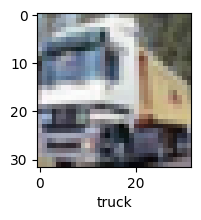

In [20]:
plot_sample(X_train,y_train,1)

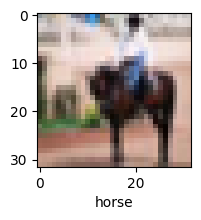

In [26]:
plot_sample(X_train,y_train,11)

In [31]:
X_train = X_train/255
X_test = X_test/255

In [32]:
X_train[1]

array([[[0.00236832, 0.00272203, 0.00287582],
        [0.00193772, 0.00210688, 0.0020915 ],
        [0.00161476, 0.00159938, 0.00146098],
        ...,
        [0.00139946, 0.00146098, 0.00109189],
        [0.00133795, 0.00138408, 0.00109189],
        [0.00121492, 0.00124567, 0.00107651]],

       [[0.00215302, 0.00246059, 0.002599  ],
        [0.00222991, 0.00235294, 0.00236832],
        [0.00192234, 0.00192234, 0.00181469],
        ...,
        [0.00147636, 0.00152249, 0.00119954],
        [0.00118416, 0.0012303 , 0.00095348],
        [0.00109189, 0.00112265, 0.0009381 ]],

       [[0.00215302, 0.0023837 , 0.00252211],
        [0.00213764, 0.00224529, 0.00229143],
        [0.00176855, 0.00176855, 0.00172241],
        ...,
        [0.00121492, 0.00126105, 0.00098424],
        [0.00104575, 0.00107651, 0.00084583],
        [0.00103037, 0.00106113, 0.00084583]],

       ...,

       [[0.00269127, 0.00256824, 0.00255286],
        [0.00239908, 0.00236832, 0.00246059],
        [0.00236832, 0

In [34]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-28 19:33:40.931806: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.1269 - loss: 2.3012
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.1266 - loss: 2.3001
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.1520 - loss: 2.2994
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.1366 - loss: 2.2986
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.1383 - loss: 2.2976


In [ ]:
# Bad performance for 5 epochs 
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1019 - loss: 3.2353


[3.235334873199463, 0.10189999639987946]

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.10      0.97      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.12      0.05      0.07      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.02      0.10      0.02     10000
weighted avg       0.02      0.10      0.02     10000



/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

In [37]:
# With convulutional and dense layers
cnn = models.Sequential([

    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [40]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2797 - loss: 2.0011
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3095 - loss: 1.9277
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3315 - loss: 1.8662
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3478 - loss: 1.8231
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3605 - loss: 1.7883
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3705 - loss: 1.7600
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3791 - loss: 1.7356
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3874 - loss: 1.7155
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3925 - loss: 1.6999
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3979 - loss: 1.6869


In [41]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1097 - loss: 749.7376


[749.7376098632812, 0.10970000177621841]